In [26]:
import pandas as pd

df = pd.read_csv('data/2023 Stats.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m')
df['Date'] = df['Date'].apply(lambda x: x.replace(year=2023))
monthly_df = df[(df['Date'].dt.month == 1) & (df['Date'].dt.day >= 1) & (df['Date'].dt.day <= 31)]
monthly_df

,Date,Open Balances,Closed,New Cases
0,2023-01-01,3315,5,345
1,2023-01-02,3655,14,588
2,2023-01-03,4229,501,867
3,2023-01-04,4348,526,819
4,2023-01-05,4621,531,778
5,2023-01-06,4762,527,686
6,2023-01-07,4921,389,289
7,2023-01-08,4821,301,258
8,2023-01-09,4466,654,662
9,2023-01-10,4422,854,655


In [27]:
period = len(monthly_df)
open_balances = [None for _ in range(period)]
open_balances[0] = monthly_df['Open Balances'][0]
new_cases = list(monthly_df['New Cases'])

In [28]:
closed_case = list(monthly_df['Closed'])

In [55]:
print(new_cases)

[792, 712, 748, 806, 703, 722, 716, 730, 648, 753, 560, 576, 722, 869, 744, 783, 873, 803, 561, 926, 602, 611, 907, 594, 749, 629, 552, 966, 915, 827, 874]


In [56]:
print(closed_case)

[5, 14, 501, 526, 531, 527, 389, 301, 654, 854, 733, 671, 567, 333, 189, 495, 635, 588, 569, 330, 179, 94, 165, 211, 508, 571, 500, 4, 1, 644, 685]


In [58]:
for i in range(period - 1):
    print(i)
    open_balances[i+1] = open_balances[i] + new_cases[i] - closed_case[i]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [57]:
print(open_balances)

[3315, 3597, 3799, 4037, 4333, 4526, 4738, 4944, 5164, 5302, 5545, 5595, 5661, 5873, 6232, 6466, 6739, 7102, 7395, 7446, 7862, 7954, 8055, 8452, 8536, 8775, 8894, 8936, 9392, 9797, 10114]


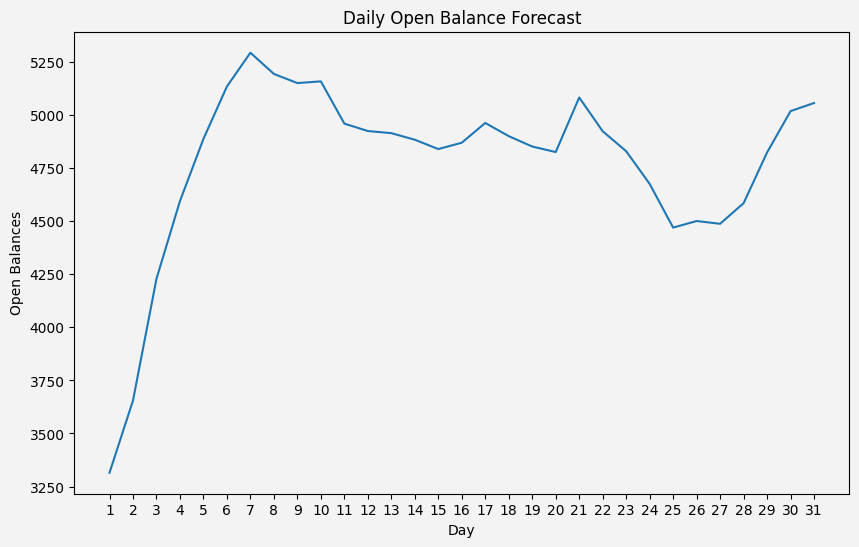

In [31]:
import matplotlib.pyplot as plt

# Sample data
days = list(range(1, period + 1))

# Set figure size
plt.figure(figsize=(10, 6),facecolor='#F2F3F2')  # Adjust width and height as needed

# Plotting the graph
plt.plot(days, open_balances)

# Adding labels and title
plt.xlabel('Day')
plt.ylabel('Open Balances')
plt.title('Daily Open Balance Forecast')

plt.xticks(days)

# Set background color within the graph area
plt.gca().set_facecolor('#F2F3F2')

# Displaying the graph
plt.show()


In [32]:
no_CSA = 6
no_CSE = 10
no_Temps = 16

In [33]:
import random

for i in range(len(new_cases)):
    new_cases[i] = random.randint(500,1000)


In [34]:
#average case closure rate per day for each agents to be estimated based on historical data
case_closure_rate_CSA = 20
case_closure_rate_CSE = 15
case_closure_rate_Temps = 15
case_closure_rate_TL = 5

In [35]:
total_case_closed_perday = (case_closure_rate_CSA*no_CSA) + (case_closure_rate_CSE*no_CSE) + (case_closure_rate_Temps*no_Temps)

In [36]:
for i in range(period - 1):
    d = i + 1
    open_balances[d] = open_balances[i] + new_cases[i] - total_case_closed_perday


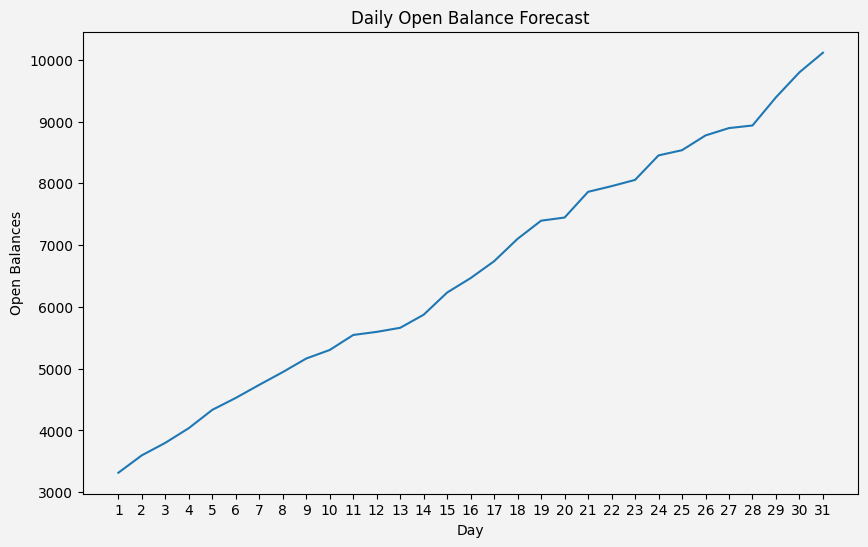

In [37]:
import matplotlib.pyplot as plt

# Sample data
days = list(range(1, period + 1))

# Set figure size
plt.figure(figsize=(10, 6),facecolor='#F2F3F2')  # Adjust width and height as needed

# Plotting the graph
plt.plot(days, open_balances)

# Adding labels and title
plt.xlabel('Day')
plt.ylabel('Open Balances')
plt.title('Daily Open Balance Forecast')

plt.xticks(days)

# Set background color within the graph area
plt.gca().set_facecolor('#F2F3F2')

# Displaying the graph
plt.show()


In [38]:
case_closure_rate_CSA_target = 0
case_closure_rate_CSE_target = 0
case_closure_rate_Temps_target = 0
case_closure_rate_TL_target = 0
total_case_closed_perday_target = (case_closure_rate_CSA_target*no_CSA) + (case_closure_rate_CSE_target*no_CSE) + (case_closure_rate_Temps_target*no_Temps)

In [39]:
import itertools

# Define ranges for case_closure_rate targets
ranges = {
    'CSA': (15, 25),
    'CSE': (10, 35),
    'Temps': (10, 25),
}

# Define function to calculate total_case_closed_perday_target
def calculate_total_case_closed(targets, counts):
    total = 0
    for target, count in zip(targets, counts):
        total += target * count
    return total

# Define function to check if open_balances differ by at most 500
def within_threshold(open_balances, threshold=500):
    for i in range(len(open_balances) - 1):
        if abs(open_balances[i + 1] - open_balances[i]) > threshold:
            return False
    return True


In [40]:
# Create a list of value ranges for each target
value_ranges = [range(start, end + 1) for start, end in ranges.values()]

# Generate all combinations of values
combinations = list(itertools.product(*value_ranges))

# Print the combinations
for combination in combinations:
    print(combination)


(15, 10, 10)
(15, 10, 11)
(15, 10, 12)
(15, 10, 13)
(15, 10, 14)
(15, 10, 15)
(15, 10, 16)
(15, 10, 17)
(15, 10, 18)
(15, 10, 19)
(15, 10, 20)
(15, 10, 21)
(15, 10, 22)
(15, 10, 23)
(15, 10, 24)
(15, 10, 25)
(15, 11, 10)
(15, 11, 11)
(15, 11, 12)
(15, 11, 13)
(15, 11, 14)
(15, 11, 15)
(15, 11, 16)
(15, 11, 17)
(15, 11, 18)
(15, 11, 19)
(15, 11, 20)
(15, 11, 21)
(15, 11, 22)
(15, 11, 23)
(15, 11, 24)
(15, 11, 25)
(15, 12, 10)
(15, 12, 11)
(15, 12, 12)
(15, 12, 13)
(15, 12, 14)
(15, 12, 15)
(15, 12, 16)
(15, 12, 17)
(15, 12, 18)
(15, 12, 19)
(15, 12, 20)
(15, 12, 21)
(15, 12, 22)
(15, 12, 23)
(15, 12, 24)
(15, 12, 25)
(15, 13, 10)
(15, 13, 11)
(15, 13, 12)
(15, 13, 13)
(15, 13, 14)
(15, 13, 15)
(15, 13, 16)
(15, 13, 17)
(15, 13, 18)
(15, 13, 19)
(15, 13, 20)
(15, 13, 21)
(15, 13, 22)
(15, 13, 23)
(15, 13, 24)
(15, 13, 25)
(15, 14, 10)
(15, 14, 11)
(15, 14, 12)
(15, 14, 13)
(15, 14, 14)
(15, 14, 15)
(15, 14, 16)
(15, 14, 17)
(15, 14, 18)
(15, 14, 19)
(15, 14, 20)
(15, 14, 21)
(15, 14, 22)

In [41]:
valid_combinations = {}

# Iterate through combinations and find the best one
for combination in combinations:
    new_open_balances = open_balances.copy()
    total_case_closed_perday_target = calculate_total_case_closed(combination, [no_CSA, no_CSE, no_Temps])
    for i in range(period - 1):
        new_open_balances[i + 1] = new_open_balances[i] + new_cases[i] - total_case_closed_perday_target

    if within_threshold(new_open_balances):
        valid_combinations[combination] = new_open_balances


In [49]:
# Sort the dictionary based on the last element of the list value
sorted_dict = dict(sorted(valid_combinations.items(), key=lambda item: item[1][-1]))
print(sorted_dict)
print(len(sorted_dict))
# Filter the sorted dictionary to include only items with last element in range 2000 to 3000
filtered_dict = {key: value for key, value in sorted_dict.items() if 2000 <= value[-1] <= 3400}

# Print the sorted dictionary
print(filtered_dict)
print(len(filtered_dict))

{(25, 35, 25): [3315, 3207, 3019, 2867, 2773, 2576, 2398, 2214, 2044, 1792, 1645, 1305, 981, 803, 772, 616, 499, 472, 375, 36, 62, -236, -525, -518, -824, -975, -1246, -1594, -1528, -1513, -1586], (24, 35, 25): [3315, 3213, 3031, 2885, 2797, 2606, 2434, 2256, 2092, 1846, 1705, 1371, 1053, 881, 856, 706, 595, 574, 483, 150, 182, -110, -393, -380, -680, -825, -1090, -1432, -1360, -1339, -1406], (25, 34, 25): [3315, 3217, 3039, 2897, 2813, 2626, 2458, 2284, 2124, 1882, 1745, 1415, 1101, 933, 912, 766, 659, 642, 555, 226, 262, -26, -305, -288, -584, -725, -986, -1324, -1248, -1223, -1286], (23, 35, 25): [3315, 3219, 3043, 2903, 2821, 2636, 2470, 2298, 2140, 1900, 1765, 1437, 1125, 959, 940, 796, 691, 676, 591, 264, 302, 16, -261, -242, -536, -675, -934, -1270, -1192, -1165, -1226], (24, 34, 25): [3315, 3223, 3051, 2915, 2837, 2656, 2494, 2326, 2172, 1936, 1805, 1481, 1173, 1011, 996, 856, 755, 744, 663, 340, 382, 100, -173, -150, -440, -575, -830, -1162, -1080, -1049, -1106], (25, 35, 24):

In [51]:
# Get the length of the dictionary
dict_length = len(filtered_dict)

# Calculate the indices for balanced selection
start_index = 0
mid_index = dict_length // 2
end_index = dict_length - 1

balanced_selection = {
    key: filtered_dict[key]
    for key in list(filtered_dict)[start_index:start_index+1] +
               list(filtered_dict)[mid_index:mid_index+1] +
               list(filtered_dict)[end_index:end_index+1]
}

# Print the balanced selection
print(balanced_selection)

{(15, 29, 25): [3315, 3327, 3259, 3227, 3253, 3176, 3118, 3054, 3004, 2872, 2845, 2625, 2421, 2363, 2452, 2416, 2419, 2512, 2535, 2316, 2462, 2284, 2115, 2242, 2056, 2025, 1874, 1646, 1832, 1967, 2014], (17, 30, 22): [3315, 3353, 3311, 3305, 3357, 3306, 3274, 3236, 3212, 3106, 3105, 2911, 2733, 2701, 2816, 2806, 2835, 2954, 3003, 2810, 2982, 2830, 2687, 2840, 2680, 2675, 2550, 2348, 2560, 2721, 2794], (25, 28, 19): [3315, 3373, 3351, 3365, 3437, 3406, 3394, 3376, 3372, 3286, 3305, 3131, 2973, 2961, 3096, 3106, 3155, 3294, 3363, 3190, 3382, 3250, 3127, 3300, 3160, 3175, 3070, 2888, 3120, 3301, 3394]}


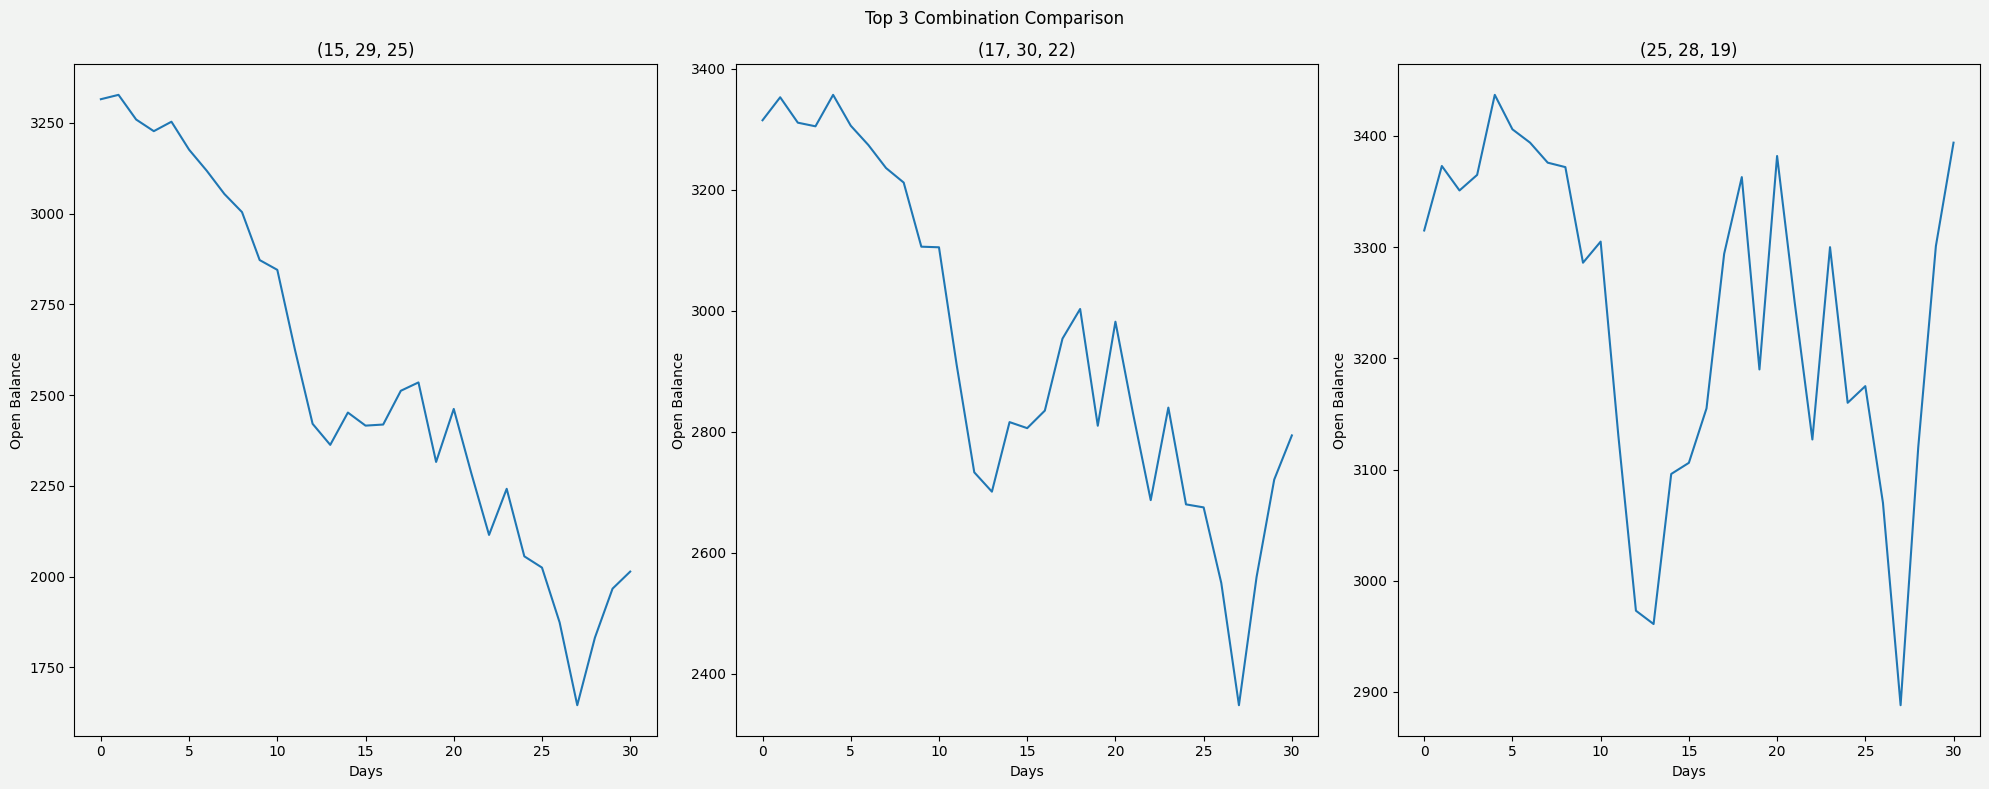

In [54]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 8), facecolor='#F2F3F2')  # Adjust the size as needed
fig.suptitle('Top 3 Combination Comparison')

# Plot each entry
for i, (key, values) in enumerate(balanced_selection.items()):
    axs[i].plot(values)
    axs[i].set_title(key)
    axs[i].set_xlabel('Days')
    axs[i].set_ylabel('Open Balance')

    # Set background color within each subplot
    axs[i].set_facecolor('#F2F3F2')

# Adjust layout
plt.tight_layout()
plt.show()


In [45]:
print(valid_combinations)

{(15, 10, 18): [3315, 3629, 3863, 4133, 4461, 4686, 4930, 5168, 5420, 5590, 5865, 5947, 6045, 6289, 6680, 6946, 7251, 7646, 7971, 8054, 8502, 8626, 8759, 9188, 9304, 9575, 9726, 9800, 10288, 10725, 11074], (15, 10, 19): [3315, 3613, 3831, 4085, 4397, 4606, 4834, 5056, 5292, 5446, 5705, 5771, 5853, 6081, 6456, 6706, 6995, 7374, 7683, 7750, 8182, 8290, 8407, 8820, 8920, 9175, 9310, 9368, 9840, 10261, 10594], (15, 10, 20): [3315, 3597, 3799, 4037, 4333, 4526, 4738, 4944, 5164, 5302, 5545, 5595, 5661, 5873, 6232, 6466, 6739, 7102, 7395, 7446, 7862, 7954, 8055, 8452, 8536, 8775, 8894, 8936, 9392, 9797, 10114], (15, 10, 21): [3315, 3581, 3767, 3989, 4269, 4446, 4642, 4832, 5036, 5158, 5385, 5419, 5469, 5665, 6008, 6226, 6483, 6830, 7107, 7142, 7542, 7618, 7703, 8084, 8152, 8375, 8478, 8504, 8944, 9333, 9634], (15, 10, 22): [3315, 3565, 3735, 3941, 4205, 4366, 4546, 4720, 4908, 5014, 5225, 5243, 5277, 5457, 5784, 5986, 6227, 6558, 6819, 6838, 7222, 7282, 7351, 7716, 7768, 7975, 8062, 8072, 84

In [46]:
top10_dict = {}
for combination, open_balance in valid_combinations.items():
    # Check if the final value in the list is more than 1000
    if open_balance[-1] > 1000:
        top10_dict[combination] = open_balance

# Sort the filtered dictionary based on the final value in the list
sorted_data = sorted(top10_dict.items(), key=lambda x: x[1][-1])

# Take only the first 10 entries with the smallest last values
top_10_data = sorted_data[:10]

In [47]:
print(top_10_data)

[((17, 31, 25), [3315, 3295, 3195, 3131, 3125, 3016, 2926, 2830, 2748, 2584, 2525, 2273, 2037, 1947, 2004, 1936, 1907, 1968, 1959, 1708, 1822, 1612, 1411, 1506, 1288, 1225, 1042, 782, 936, 1039, 1054]), ((18, 32, 24), [3315, 3295, 3195, 3131, 3125, 3016, 2926, 2830, 2748, 2584, 2525, 2273, 2037, 1947, 2004, 1936, 1907, 1968, 1959, 1708, 1822, 1612, 1411, 1506, 1288, 1225, 1042, 782, 936, 1039, 1054]), ((19, 33, 23), [3315, 3295, 3195, 3131, 3125, 3016, 2926, 2830, 2748, 2584, 2525, 2273, 2037, 1947, 2004, 1936, 1907, 1968, 1959, 1708, 1822, 1612, 1411, 1506, 1288, 1225, 1042, 782, 936, 1039, 1054]), ((20, 34, 22), [3315, 3295, 3195, 3131, 3125, 3016, 2926, 2830, 2748, 2584, 2525, 2273, 2037, 1947, 2004, 1936, 1907, 1968, 1959, 1708, 1822, 1612, 1411, 1506, 1288, 1225, 1042, 782, 936, 1039, 1054]), ((21, 35, 21), [3315, 3295, 3195, 3131, 3125, 3016, 2926, 2830, 2748, 2584, 2525, 2273, 2037, 1947, 2004, 1936, 1907, 1968, 1959, 1708, 1822, 1612, 1411, 1506, 1288, 1225, 1042, 782, 936, 103

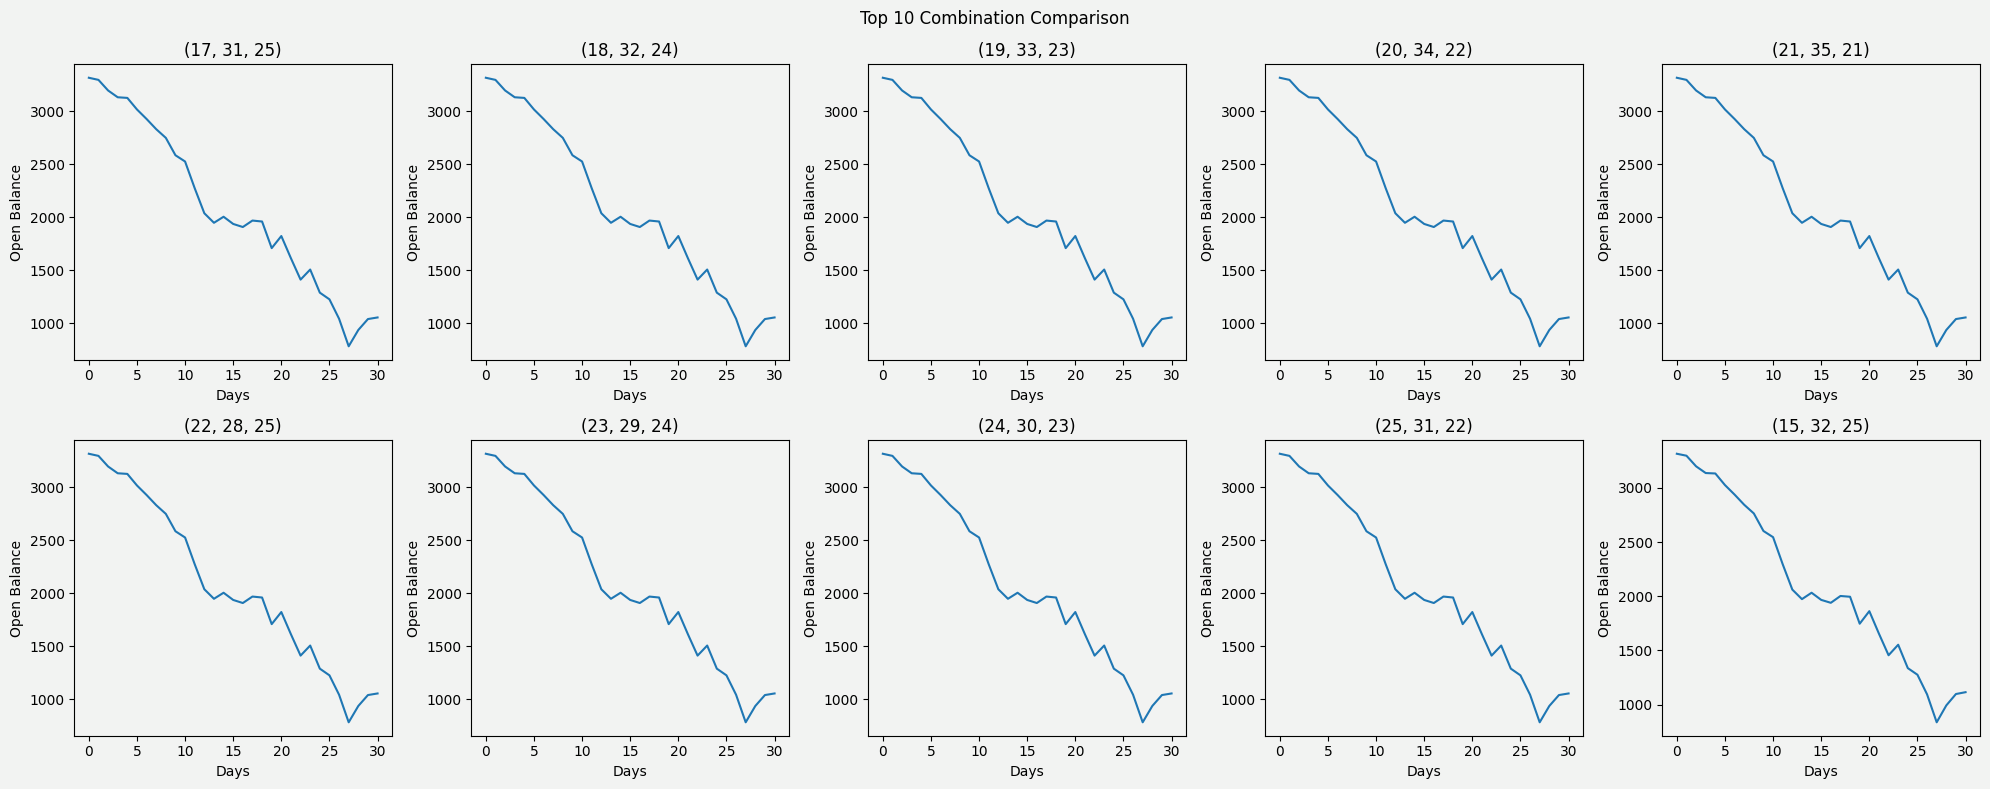

In [48]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(2, 5, figsize=(20, 8),facecolor='#F2F3F2')  # Adjust the size as needed
fig.suptitle('Top 10 Combination Comparison')

# Plot each entry
for i, (key, values) in enumerate(top_10_data):
    row = i // 5
    col = i % 5
    axs[row, col].plot(values)
    axs[row, col].set_title(key)
    axs[row, col].set_xlabel('Days')
    axs[row, col].set_ylabel('Open Balance')

    # Set background color within each subplot
    axs[row, col].set_facecolor('#F2F3F2')

# Adjust layout
plt.tight_layout()
plt.show()
